In [1]:
import pandas as pd
import matplotlib.pyplot as plt

'''
    df_popular = pd.read_csv("./data/most-popular-netflix.csv")
    df_global_weekly = pd.read_csv("./data/all-weeks-global-netflix.csv")
    df_country_weekly = pd.read_csv("./data/all-weeks-countries-netflix.csv")
'''
# 1) Load files - change paths if needed
g = pd.read_csv("./data/all-weeks-global-netflix.csv")
p = pd.read_csv("./data/most-popular-netflix.csv")
c = pd.read_csv("./data/all-weeks-countries-netflix.csv")



In [2]:
g.head()

,week,category,weekly_rank,show_title,season_title,weekly_hours_viewed,runtime,weekly_views,cumulative_weeks_in_top_10,is_staggered_launch,episode_launch_details
0,2024-04-14,Films (English),1,What Jennifer Did,NaN,26100000,1.4500,18000000.0,1,False,NaN
1,2024-04-14,Films (English),2,Woody Woodpecker Goes to Camp,NaN,19600000,1.6667,11800000.0,1,False,NaN
2,2024-04-14,Films (English),3,Scoop,NaN,14600000,1.7167,8500000.0,2,False,NaN
3,2024-04-14,Films (English),4,Glass,NaN,11000000,2.1500,5100000.0,2,False,NaN
4,2024-04-14,Films (English),5,Megan Leavey,NaN,9700000,1.9333,5000000.0,1,False,NaN


In [3]:
p.head()

,category,rank,show_title,season_title,hours_viewed_first_91_days,runtime,views_first_91_days
0,Films (English),1,Red Notice,NaN,454200000,1.9667,230900000
1,Films (English),2,Don't Look Up,NaN,408600000,2.3833,171400000
2,Films (English),3,The Adam Project,NaN,281000000,1.7833,157600000
3,Films (English),4,Bird Box,NaN,325300000,2.0667,157400000
4,Films (English),5,Leave the World Behind,NaN,339300000,2.3667,143400000


In [4]:
c.head()

,country_name,country_iso2,week,category,weekly_rank,show_title,season_title,cumulative_weeks_in_top_10
0,Argentina,AR,2024-04-14,Films,1,The Tearsmith,NaN,2
1,Argentina,AR,2024-04-14,Films,2,Stolen,NaN,1
2,Argentina,AR,2024-04-14,Films,3,"Love, Divided",NaN,1
3,Argentina,AR,2024-04-14,Films,4,Woody Woodpecker Goes to Camp,NaN,1
4,Argentina,AR,2024-04-14,Films,5,Rest In Peace,NaN,3


In [5]:

# Convert week columns
for df in (g, c):
    if 'week' in df.columns:
        df['week'] = pd.to_datetime(df['week'], errors='coerce')

# Ensure numeric conversions
for df in (g, p, c):
    for col in ['weekly_hours_viewed','weekly_views','hours_viewed_first_91_days','views_first_91_days','runtime']:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')


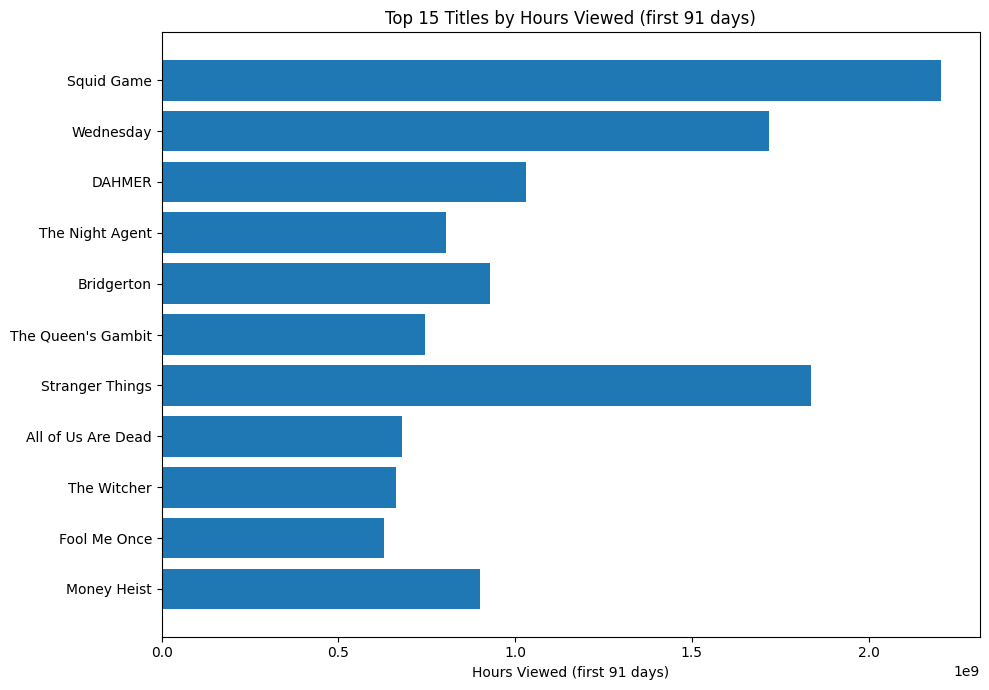

In [7]:

# ------- VISUAL 2: Top 15 titles by hours_viewed_first_91_days -------
if 'hours_viewed_first_91_days' in p.columns:
    top_titles = p.sort_values('hours_viewed_first_91_days', ascending=False).head(15)
    plt.figure(figsize=(10,7))
    plt.barh(top_titles['show_title'].astype(str)[::-1], top_titles['hours_viewed_first_91_days'][::-1])
    plt.title('Top 15 Titles by Hours Viewed (first 91 days)')
    plt.xlabel('Hours Viewed (first 91 days)')
    plt.tight_layout()
    plt.show()


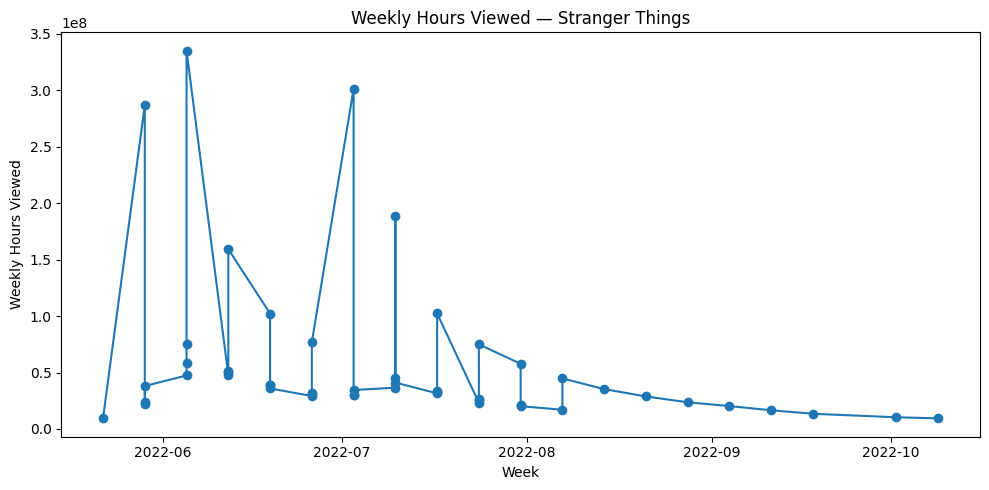

In [8]:

# # ------- VISUAL 3: Time series for most-seen show in global dataset -------
if 'weekly_hours_viewed' in g.columns:
    top_show = g.groupby('show_title')['weekly_hours_viewed'].sum().sort_values(ascending=False).head(1).index[0]
    ts = g[g['show_title'] == top_show].sort_values('week')
    plt.figure(figsize=(10,5))
    plt.plot(ts['week'], ts['weekly_hours_viewed'], marker='o')
    plt.title(f'Weekly Hours Viewed — {top_show}')
    plt.xlabel('Week')
    plt.ylabel('Weekly Hours Viewed')
    plt.tight_layout()
    plt.show()


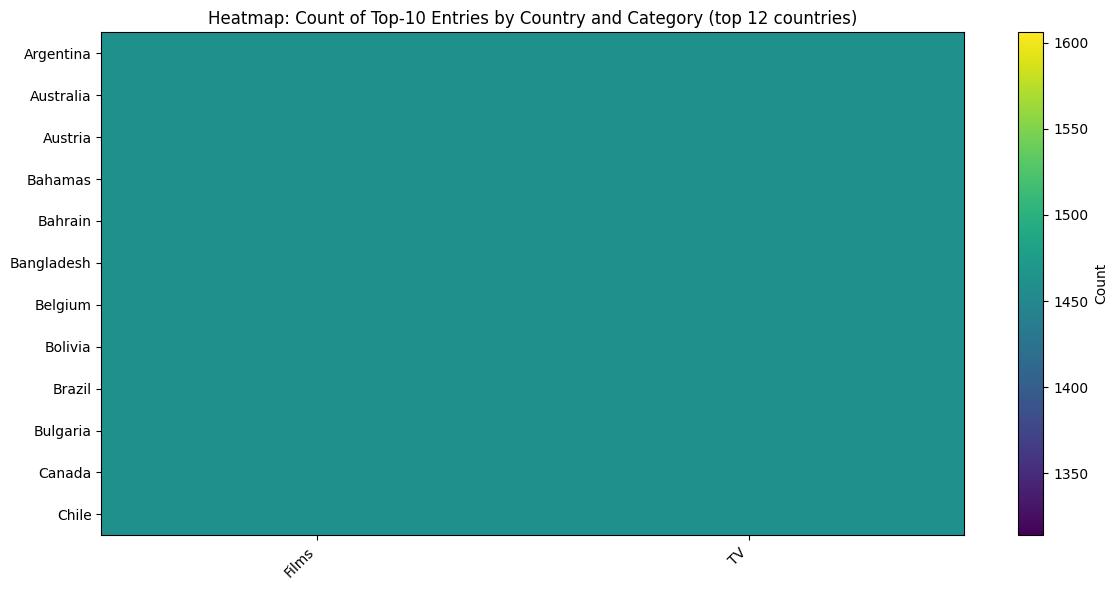

In [14]:

# ------- VISUAL 5: Heatmap (country x category) for top 12 countries -------
top_countries = c['country_name'].value_counts().head(12).index
pivot = (c[c['country_name'].isin(top_countries)]
         .pivot_table(index='country_name', columns='category', values='show_title', aggfunc='count', fill_value=0))
plt.figure(figsize=(12,6))
plt.imshow(pivot.values, aspect='auto')
plt.yticks(range(len(pivot.index)), pivot.index)
plt.xticks(range(len(pivot.columns)), pivot.columns, rotation=45, ha='right')
plt.title('Heatmap: Count of Top-10 Entries by Country and Category (top 12 countries)')
plt.colorbar(label='Count')
plt.tight_layout()
plt.show()


C:\Users\gyanr\AppData\Local\Temp\ipykernel_8728\1161221278.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box_data, labels=top_categories, showfliers=False)


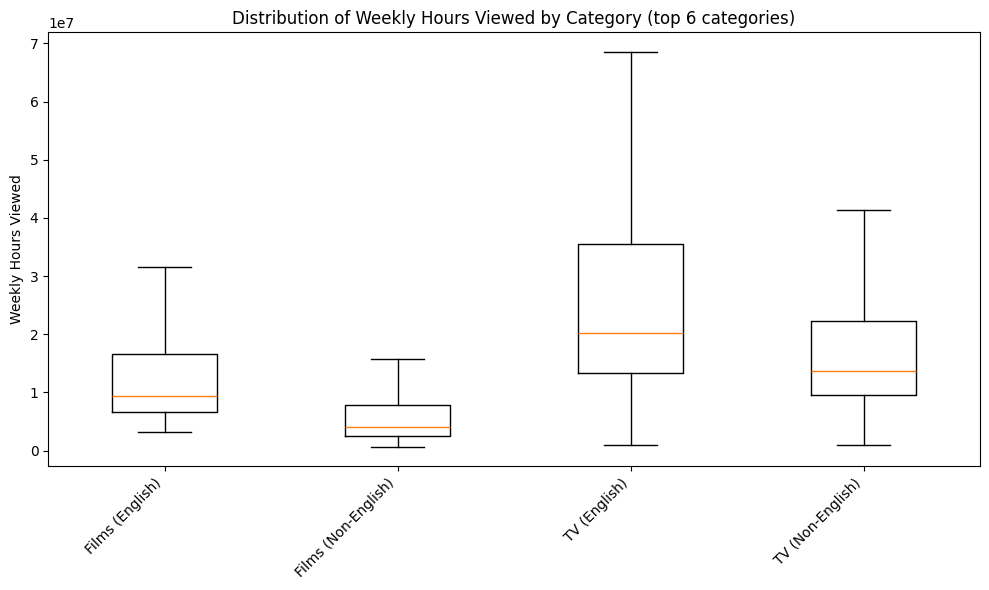

In [11]:

# ------- VISUAL 6: Boxplot distribution of weekly_hours_viewed by top 6 categories -------
top_categories = g['category'].value_counts().head(6).index.tolist()
box_data = [g[g['category']==cat]['weekly_hours_viewed'].dropna() for cat in top_categories]
plt.figure(figsize=(10,6))
plt.boxplot(box_data, labels=top_categories, showfliers=False)
plt.title('Distribution of Weekly Hours Viewed by Category (top 6 categories)')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Weekly Hours Viewed')
plt.tight_layout()
plt.show()


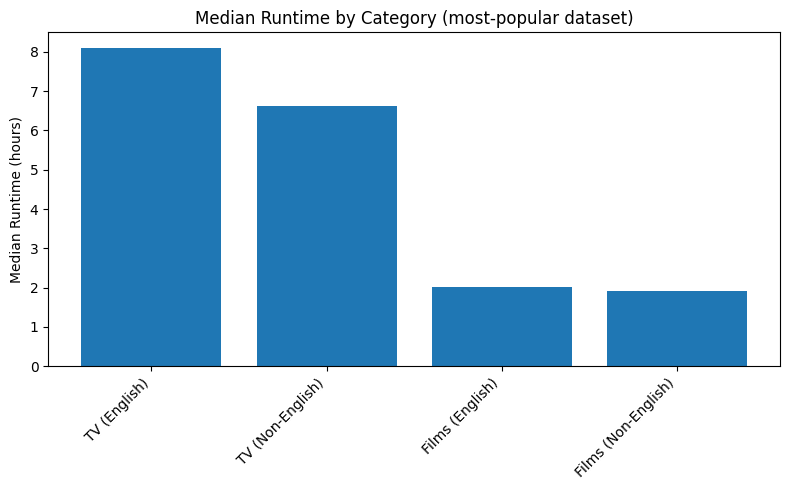

In [12]:

# ------- VISUAL 7 (extra): Median runtime by category (if present) -------
if 'runtime' in p.columns:
    rt = p.groupby('category')['runtime'].median().sort_values(ascending=False)
    plt.figure(figsize=(8,5))
    plt.bar(rt.index, rt.values)
    plt.title('Median Runtime by Category (most-popular dataset)')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Median Runtime (hours)')
    plt.tight_layout()
    plt.show()


In [13]:

# ------- Write the 250-500 word paper to a txt file -------
paper_text = """
Audience: Netflix Content Executives and Regional Programming Leads.
Purpose: Use Top-10 global and country-level trends to recommend shifting investment towards international originals, optimizing promotional windows, and tailoring regional marketing to sustain long-term engagement.

Design/Medium: I chose a slide-friendly visual medium (png images) so visuals can be placed into a 6–8 slide deck. Visuals include counts by category, top titles by hours, a time-series for the most-watched title, country rankings, a country-category heatmap, and distributions of weekly hours. These provide both high-level summary (bars/heatmap) and distributional detail (boxplot/time series) to inform decisions.

Key Findings (summary): Non-English and regionally popular titles frequently re-enter Top-10 lists and have strong cumulative hours—suggesting sustained engagement beyond initial launch windows. Country-level heatmaps reveal differing category mixes (e.g., Films vs. Series dominance) which implies promotional strategies should be country-specific. Boxplots show variance by category, indicating that some categories have more consistent weekly-hours performance while others are spike-driven.

Call to action: Reallocate 15% of the upcoming quarter’s content budget to high-performing international originals and incrementally increase regional marketing for titles with proven cross-border uptake. Pilot the approach in three markets (e.g., Mexico, South Korea, Spain) and measure MAPE/RMSE on predicted vs actual weekly hours to evaluate success.

Ethical considerations: Ensure representation and avoid cultural stereotyping when promoting or commissioning international content. Respect user privacy by using aggregated, anonymized viewership metrics only. Monitor regional fairness: avoid over-indexing on markets that might crowd out emerging creators or minority-language content.
"""